![logo](1_bDwEvCRgrKVbLrAXEixpfA.png)
___

##### importing libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline 
sns.set(color_codes=True)

import functools as ft

#bag of words model
from sklearn.feature_extraction.text import CountVectorizer
import re

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#classification 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

# Step 6 - Classification I:
# Original & Resampled Data (_without_ outliers)
    a) Importing Data
    
    b) Resampling
        i) Random Over Sampling
       ii) Random Under Sampling  
       
    c) Classification
        i) Naive Bayes
            - Original
            - Over-sampled
            - Under-sampled
       ii) Logistic Regression
            - Original
            - Over-sampled
            - Under-sampled
      iii) K-Nearest Neighbours
            - Original
            - Over-sampled
            - Under-sampled

## a) Importing data

In [2]:
#import cleaned2_data.csv file
cleaned2_df = pd.read_csv("cleaned2_data.csv")

cleaned2_df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(cleaned2_df.shape)

(10062, 22)


In [3]:
#import corpus_data.csv file
corpus_df = pd.read_csv("corpus_data.csv")

corpus_df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(corpus_df.shape)
corpus_df.head()

(10062, 1)


,blurb
0,treehouse cornell take architecture new height...
1,track collection new original musical piece jo...
2,juxtaposing delicious food good friend unsettl...
3,melody mus tell story melody struggle encounte...
4,mission help build passion science teaching ne...


## b) Resampling

In [4]:
#change successful:1 / failed:0 in state column (y-dependent-variable)
print(cleaned2_df['state'].unique())
cleaned2_df.state.replace(['successful', 'failed'], [1, 0], inplace=True)
print(cleaned2_df['state'].unique())

['failed' 'successful']
[0 1]


In [5]:
cleaned2_df['state'].value_counts()

1    5998
0    4064
Name: state, dtype: int64

In [6]:
#class count
count_class_1, count_class_0 = cleaned2_df.state.value_counts()

#divide by class
df_class_0 = cleaned2_df[cleaned2_df['state'] == 0]
df_class_1 = cleaned2_df[cleaned2_df['state'] == 1]

##### i) Random Over-Sampling

Random over-sampling:
1    5998
0    5998
Name: state, dtype: int64


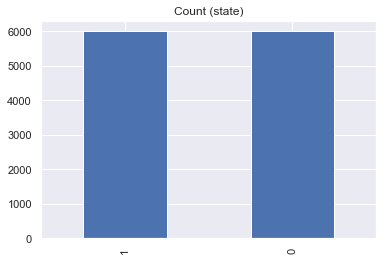

In [7]:
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_class_0_over, df_class_1], axis=0)

print('Random over-sampling:')
print(df_test_over.state.value_counts())

df_test_over.state.value_counts().plot(kind='bar', title='Count (state)');

##### iI) Random under-sampling

Random under-sampling:
1    4064
0    4064
Name: state, dtype: int64


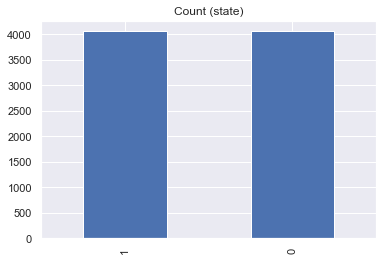

In [8]:
df_class_1_under = df_class_1.sample(count_class_0)
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)
df_test_under['state'].value_counts()
print('Random under-sampling:')
print(df_test_under.state.value_counts())

df_test_under.state.value_counts().plot(kind='bar', title='Count (state)')

## c) Classification (Original data, Oversampled data, Undersampled data)

The following lines will include classification algorithms using 3 types of data: the original data with outliers removed, oversampled data, and undersampled data.

### i) NAIVE BAYES
##### original data

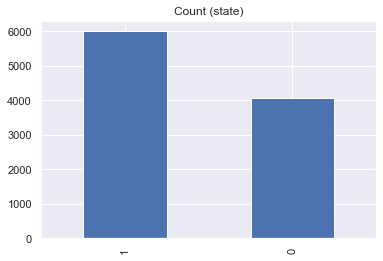

In [21]:
cleaned2_df.state.value_counts().plot(kind='bar', title='Count (state)');

In [22]:
#use 3500 most frequent words in bag of words model
cv = CountVectorizer(max_features = 3500)
X = cv.fit_transform(corpus_df['blurb'].apply(lambda X: np.str_(X))).toarray()
print(X.shape)
X

(10062, 3500)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
#create dependent variable with 'state' column
y = cleaned2_df.iloc[:, 20].values
y

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

Confusion matrix:
 [[691 338]
 [471 532]]


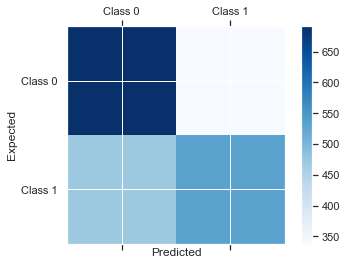

In [69]:
#splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#fitting Naive Bayes to the training set
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

#predicting the test set results
y_pred = nb_classifier.predict(X_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [28]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 51.91%
 Precision: 72.93%
    Recall: 30.14%
  F1 score: 42.65%
 ROC score: 56.91%


##### over-sampled data

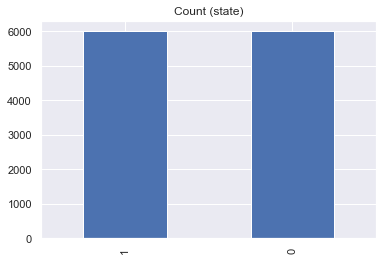

In [29]:
df2_test_over_df = pd.DataFrame(df_test_over)
df2_test_over_df.state.value_counts().plot(kind='bar', title='Count (state)');

In [30]:
#use 4500 most frequent words in bag of words model
cv = CountVectorizer(max_features = 4500)
X = cv.fit_transform(df2_test_over_df['blurb'].apply(lambda X: np.str_(X))).toarray()
print(X.shape)
X

(11996, 4500)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
#create dependent variable with 'state' column
y = df2_test_over_df.iloc[:, 20].values

Confusion matrix:
 [[ 787  697]
 [ 285 1230]]


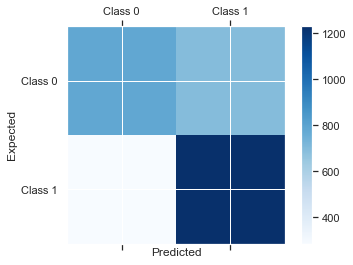

In [32]:
#splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#fitting Naive Bayes to the training set
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

#predicting the test set results
y_pred = nb_classifier.predict(X_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [33]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 67.26%
 Precision: 63.83%
    Recall: 81.19%
  F1 score: 71.47%
 ROC score: 67.11%


##### under-sampled data

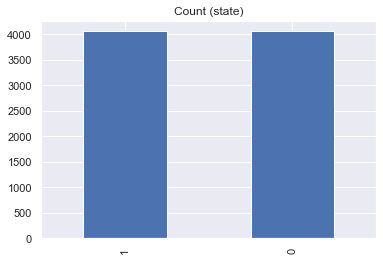

In [34]:
df2_test_under_df = pd.DataFrame(df_test_under)
df2_test_under_df.state.value_counts().plot(kind='bar', title='Count (state)');

In [35]:
#use 4500 most frequent words in bag of words model
cv = CountVectorizer(max_features = 4500)
X = cv.fit_transform(df2_test_under_df['blurb'].apply(lambda X: np.str_(X))).toarray()
print(X.shape)
X

(8128, 4500)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
#create dependent variable with 'state' column
y = df2_test_under_df.iloc[:, 20].values

Confusion matrix:
 [[691 338]
 [471 532]]


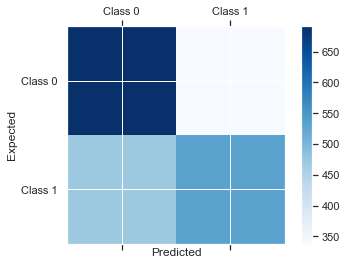

In [37]:
#splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#fitting Naive Bayes to the training set
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

#predicting the test set results
y_pred = nb_classifier.predict(X_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [38]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 60.19%
 Precision: 61.15%
    Recall: 53.04%
  F1 score: 56.81%
 ROC score: 60.10%


### ii) Logistic Regression
##### original data

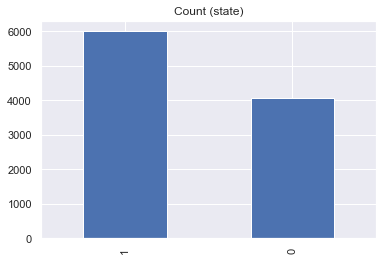

In [39]:
cleaned2_df.state.value_counts().plot(kind='bar', title='Count (state)');

In [40]:
#use 3500 most frequent words in bag of words model
cv = CountVectorizer(max_features = 3500)
X = cv.fit_transform(corpus_df['blurb'].apply(lambda X: np.str_(X))).toarray()
print(X.shape)
X

(10062, 3500)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
#create dependent variable with 'state' column
y = cleaned2_df.iloc[:, 20].values
y

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

C:\Users\vlad_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[ 455  568]
 [ 395 1098]]


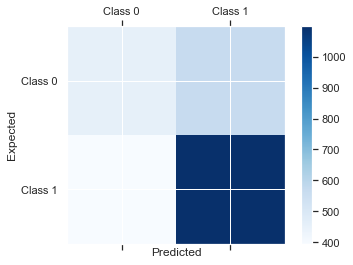

In [42]:
#splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#fitting logistic regression to the training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

#predicting the test set results
y_pred = classifier.predict(X_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [43]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 61.72%
 Precision: 65.91%
    Recall: 73.54%
  F1 score: 69.52%
 ROC score: 59.01%


##### over-sampled data

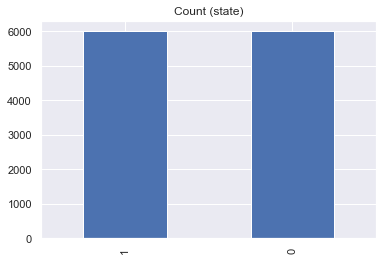

In [44]:
df2_test_over_df = pd.DataFrame(df_test_over)
df2_test_over_df.state.value_counts().plot(kind='bar', title='Count (state)');

In [45]:
#use 4500 most frequent words in bag of words model
cv = CountVectorizer(max_features = 4500)
X = cv.fit_transform(df2_test_over_df['blurb'].apply(lambda X: np.str_(X))).toarray()
print(X.shape)
X

(11996, 4500)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
#create dependent variable with 'state' column
y = df2_test_over_df.iloc[:, 20].values

Confusion matrix:
 [[ 787  697]
 [ 285 1230]]


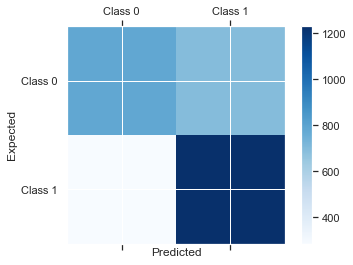

In [47]:
#splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#fitting Naive Bayes to the training set
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

#predicting the test set results
y_pred = nb_classifier.predict(X_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [48]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 67.26%
 Precision: 63.83%
    Recall: 81.19%
  F1 score: 71.47%
 ROC score: 67.11%


##### under-sampled data

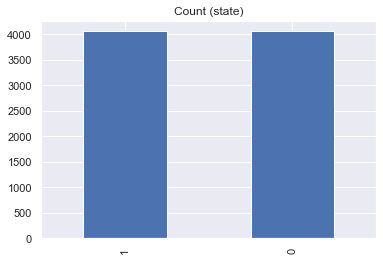

In [49]:
df2_test_under_df = pd.DataFrame(df_test_under)
df2_test_under_df.state.value_counts().plot(kind='bar', title='Count (state)');

In [50]:
#use 4500 most frequent words in bag of words model
cv = CountVectorizer(max_features = 4500)
X = cv.fit_transform(df2_test_under_df['blurb'].apply(lambda X: np.str_(X))).toarray()
print(X.shape)
X

(8128, 4500)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [51]:
#create dependent variable with 'state' column
y = df2_test_under_df.iloc[:, 20].values

Confusion matrix:
 [[691 338]
 [471 532]]


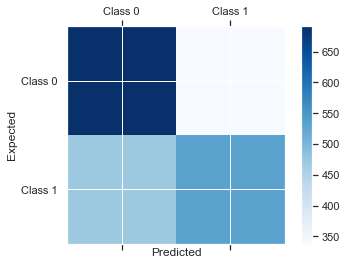

In [52]:
#splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#fitting Naive Bayes to the training set
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

#predicting the test set results
y_pred = nb_classifier.predict(X_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [53]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 60.19%
 Precision: 61.15%
    Recall: 53.04%
  F1 score: 56.81%
 ROC score: 60.10%


### K-Nearest Neighbour
##### original data

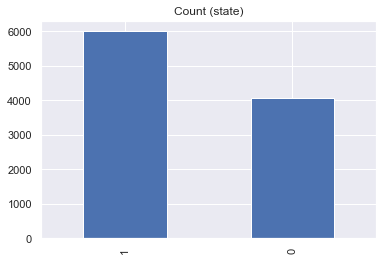

In [54]:
cleaned2_df.state.value_counts().plot(kind='bar', title='Count (state)');

In [55]:
#use 3500 most frequent words in bag of words model
cv = CountVectorizer(max_features = 3500)
X = cv.fit_transform(corpus_df['blurb'].apply(lambda X: np.str_(X))).toarray()
print(X.shape)
X

(10062, 3500)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
#create dependent variable with 'state' column
y = cleaned2_df.iloc[:, 20].values
y

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

Confusion matrix:
 [[ 335  688]
 [ 295 1198]]


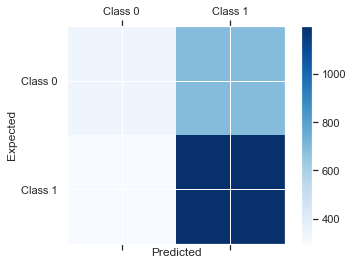

In [57]:
#splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#fitting KNN to the training set
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

#predicting the test set results
y_pred = knn_classifier.predict(X_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [58]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 60.93%
 Precision: 63.52%
    Recall: 80.24%
  F1 score: 70.91%
 ROC score: 56.49%


##### over-sampled data

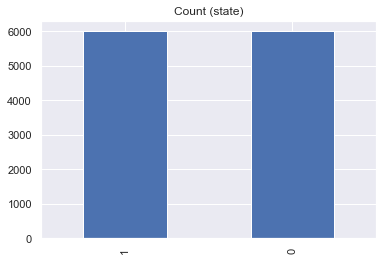

In [59]:
df2_test_over_df = pd.DataFrame(df_test_over)
df2_test_over_df.state.value_counts().plot(kind='bar', title='Count (state)');

In [60]:
#use 4500 most frequent words in bag of words model
cv = CountVectorizer(max_features = 4500)
X = cv.fit_transform(df2_test_over_df['blurb'].apply(lambda X: np.str_(X))).toarray()
print(X.shape)
X

(11996, 4500)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [61]:
#create dependent variable with 'state' column
y = df2_test_over_df.iloc[:, 20].values

Confusion matrix:
 [[ 831  653]
 [ 493 1022]]


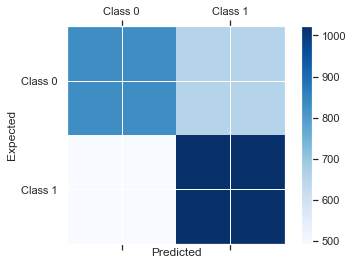

In [62]:
#splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#fitting KNN to the training set
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

#predicting the test set results
y_pred = knn_classifier.predict(X_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [63]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 61.79%
 Precision: 61.01%
    Recall: 67.46%
  F1 score: 64.08%
 ROC score: 61.73%


##### under-sampled data

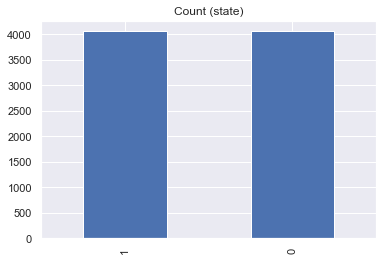

In [9]:
df2_test_under_df = pd.DataFrame(df_test_under)
df2_test_under_df.state.value_counts().plot(kind='bar', title='Count (state)');

In [10]:
#use 4500 most frequent words in bag of words model
cv = CountVectorizer(max_features = 4500)
X = cv.fit_transform(df2_test_under_df['blurb'].apply(lambda X: np.str_(X))).toarray()
print(X.shape)
X

(8128, 4500)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
#create dependent variable with 'state' column
y = df2_test_under_df.iloc[:, 20].values

Confusion matrix:
 [[464 565]
 [399 604]]


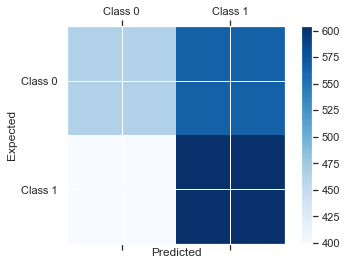

In [12]:
#splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#fitting KNN to the training set
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

#predicting the test set results
y_pred = knn_classifier.predict(X_test)

#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [13]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 52.56%
 Precision: 51.67%
    Recall: 60.22%
  F1 score: 55.62%
 ROC score: 52.66%


### End of Step 6